## XGBoost Implementation

In [89]:
import pandas as pd

- Loading the preprocessed dataset

In [90]:
df = pd.read_csv("preprocessed_diabetes.csv")

In [91]:
df.shape

(101763, 77)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 77 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Unnamed: 0                       101763 non-null  int64  
 1   admission_type_id                101763 non-null  int64  
 2   discharge_disposition_id         101763 non-null  int64  
 3   admission_source_id              101763 non-null  int64  
 4   time_in_hospital                 101763 non-null  int64  
 5   num_lab_procedures               101763 non-null  int64  
 6   num_procedures                   101763 non-null  int64  
 7   num_medications                  101763 non-null  int64  
 8   number_outpatient                101763 non-null  int64  
 9   number_emergency                 101763 non-null  int64  
 10  number_inpatient                 101763 non-null  int64  
 11  number_diagnoses                 101763 non-null  int64  
 12  di

In [93]:
df.head(8)

,Unnamed: 0,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,metformin-rosiglitazone_Steady,metformin-pioglitazone_Steady,change_No,diabetesMed_Yes,age_ord,max_glu_serum_ord,A1Cresult_ord,payer_code_freq,medical_specialty_freq,readmitted_binary
0,0,6,25,1,1,41,0,1,0,0,...,0,0,1,0,0,0,0,0.395576,0.001562,0
1,1,1,1,7,3,59,0,18,0,0,...,0,0,0,1,1,0,0,0.395576,0.490817,0
2,2,1,1,7,2,11,5,13,2,0,...,0,0,1,1,2,0,0,0.395576,0.490817,0
3,3,1,1,7,2,44,1,16,0,0,...,0,0,0,1,3,0,0,0.395576,0.490817,0
4,4,1,1,7,1,51,0,8,0,0,...,0,0,0,1,4,0,0,0.395576,0.490817,0
5,5,2,1,2,3,31,6,16,0,0,...,0,0,1,1,5,0,0,0.395576,0.490817,0
6,6,3,1,2,4,70,1,21,0,0,...,0,0,0,1,6,0,0,0.395576,0.490817,0
7,7,1,1,7,5,73,0,12,0,0,...,0,0,1,1,7,0,0,0.395576,0.490817,0


In [94]:
# Dropping columns not needed for modeling
X = df.drop(columns=['Unnamed: 0', 'readmitted_binary'])  # Features
y = df['readmitted_binary']                               # Target

- I am using an 80/20 train-test split, which is a widely accepted standard for machine learning workflows.
- `random_state` is set to ensure reproducibility of results across different runs.
- `stratify=y` is specified because the dataset is imbalanced; this ensures that the class distribution is preserved in both the training and test sets.

In [95]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [96]:
import xgboost as xgb

# Training a base model initially then we will further optimize
xgb_model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [101]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8889598584975188
ROC AUC: 0.6879015143644995

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     18082
           1       0.61      0.01      0.03      2271

    accuracy                           0.89     20353
   macro avg       0.75      0.51      0.48     20353
weighted avg       0.86      0.89      0.84     20353



- The model is heavily biased towards the majority class and fails to detect the minority class (class 1), as shown by the very low recall and F1-score for class 1.

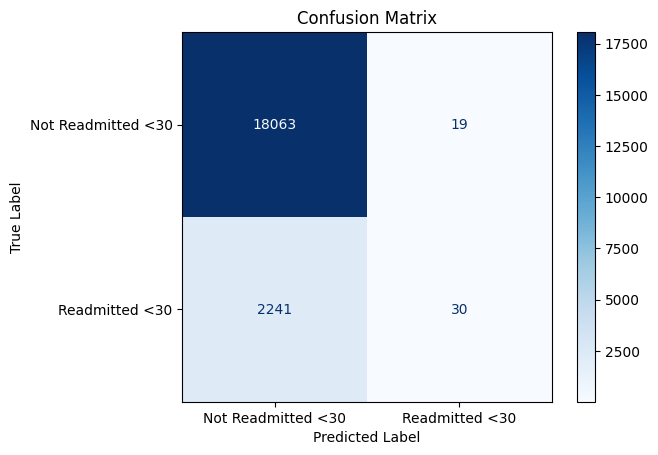

In [99]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plotting confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted <30', 'Readmitted <30'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

- In imbalanced datasets, models tend to favor the majority class because mistakes on the minority class matter less.
- Setting scale_pos_weight increases the penalty for misclassifying minority class samples, helping the model focus more on correctly predicting them.

In [102]:
# Calculate class counts
neg = (y_train == 0).sum()
pos = (y_train == 1).sum()
scale_pos_weight = neg / pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

scale_pos_weight: 7.96


In [103]:
xgb_model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [105]:
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6727263794035278
ROC AUC: 0.6871110208784669

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.68      0.79     18082
           1       0.19      0.59      0.29      2271

    accuracy                           0.67     20353
   macro avg       0.56      0.64      0.54     20353
weighted avg       0.85      0.67      0.73     20353



#### Analysis
- Minority class recall improved drastically from 0.01 to 0.59, meaning the model now correctly identifies 59% of class 1 cases instead of just 1%.

- Minority class f1-score increased from 0.03 to 0.29, indicating much better balance between precision and recall for class 1.

- The new model is far better at identifying minority class cases, making it much more useful for imbalanced classification tasks where detecting the minority class is critical.

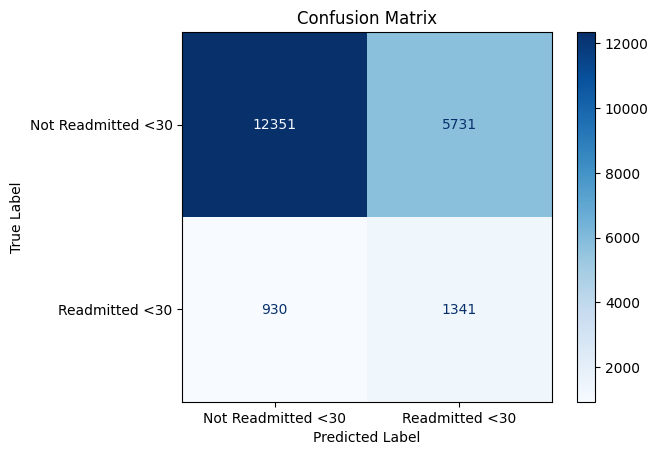

In [106]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted <30', 'Readmitted <30'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Feature Importance using SHAP

In [16]:
!pip install shap

SHAP (SHapley Additive exPlanations) assigns each feature an importance value for a specific prediction, showing how much that feature contributed to pushing the prediction higher or lower compared to the average predictio

In [107]:
import shap

# SHAP explainer for our trained XGBoost model
explainer = shap.Explainer(xgb_model)

In [108]:
# Calculating SHAP values for our test set
shap_values = explainer(X_test)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

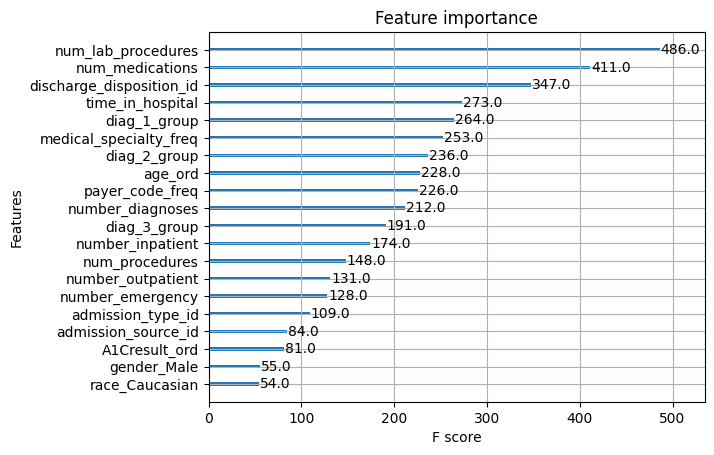

In [109]:
xgb.plot_importance(xgb_model, max_num_features=20 )

XGBoost's built-in importance tells you which features the model used most often or which splits led to the largest improvements in purity ("gain"). However, this can be misleading: a feature might be used a lot but have little actual impact on predictions, or vice versa

SHAP values tell you, on average, how much each feature is actually influencing the model’s output, both positively and negatively, across all samples. This is a more direct measure of how important a feature is for your specific predictions.

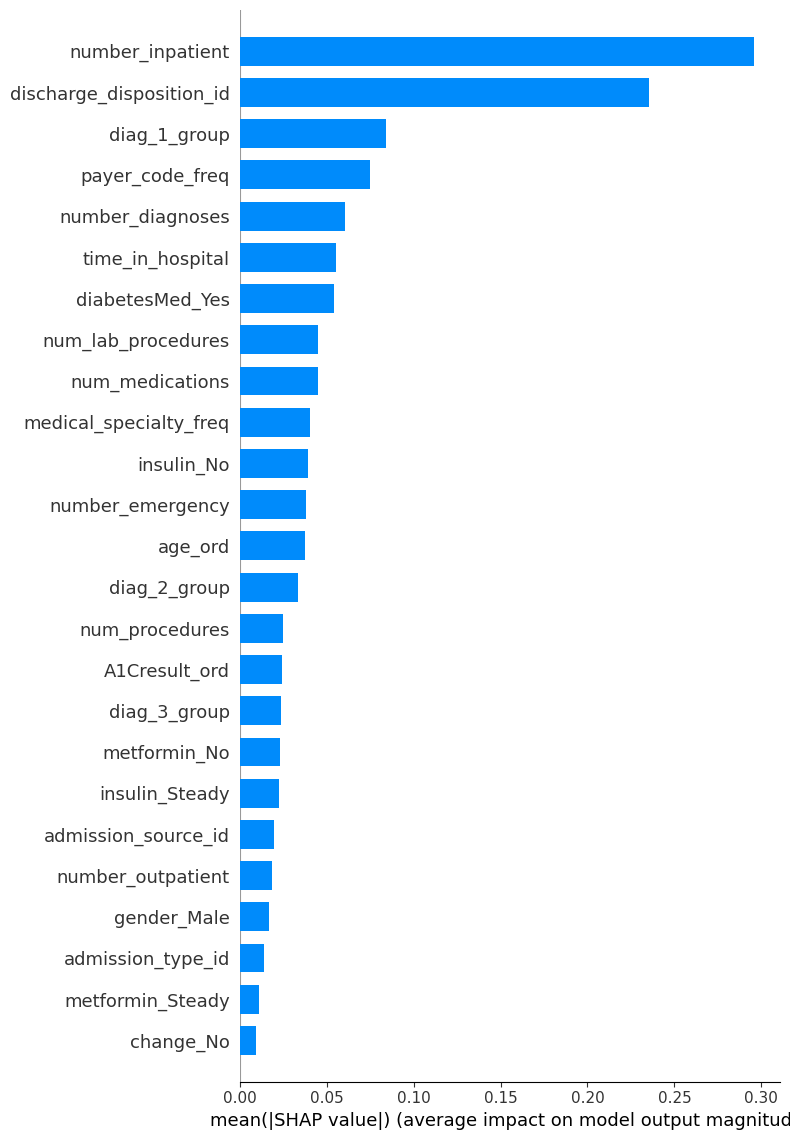

In [110]:
shap.summary_plot(shap_values, X_test, plot_type="bar", max_display=25)

- If we didn't mention bar plots specifically, then SHAP summary plot combines feature importance and feature effect directionality

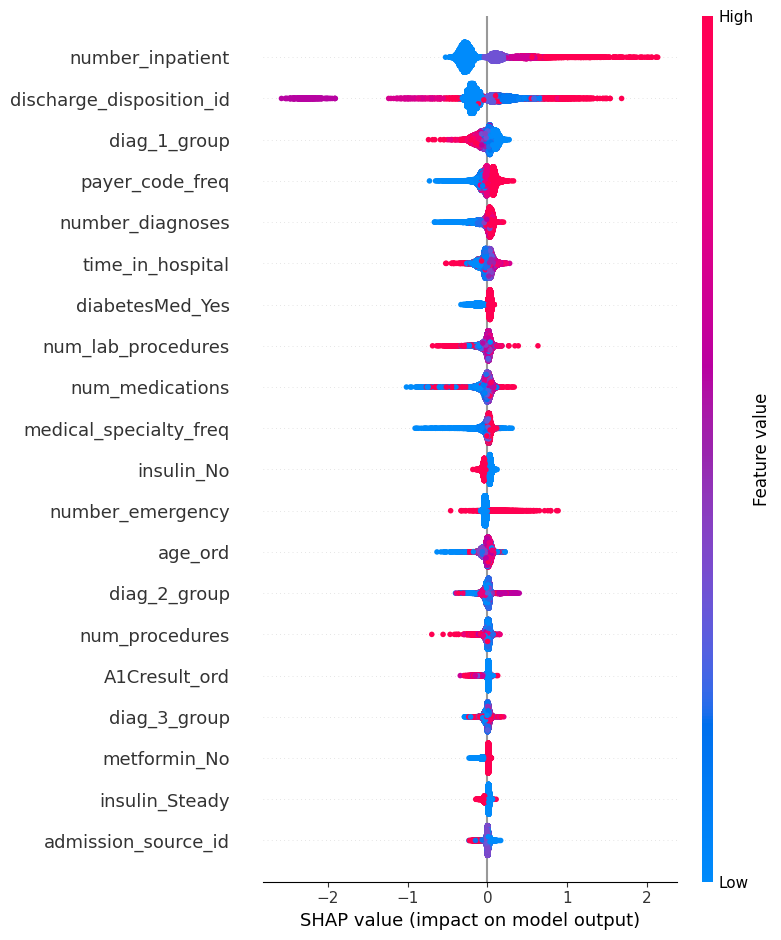

In [111]:
shap.summary_plot(shap_values, X_test)

In [112]:
import numpy as np

# Calculating mean absolute SHAP value for each feature
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)

# Let's set our importance threshold
threshold = 0.010

# Selecting features above the threshold
feature_names = X_test.columns
important_features = feature_names[mean_abs_shap > threshold].tolist()

print("Number of important features:", len(important_features))
print("Important features:", important_features)

Number of important features: 24
Important features: ['admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'diag_1_group', 'diag_2_group', 'diag_3_group', 'gender_Male', 'metformin_No', 'metformin_Steady', 'insulin_No', 'insulin_Steady', 'diabetesMed_Yes', 'age_ord', 'A1Cresult_ord', 'payer_code_freq', 'medical_specialty_freq']


In [113]:
X_full = X.copy()  # In pandas it is deep copy by default
X_reduced = X[important_features].copy()

In [114]:
import warnings
warnings.filterwarnings('ignore')

In [115]:
from sklearn.model_selection import cross_val_score

model = xgb.XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# Cross-validation on full feature set
scores_full = cross_val_score(model, X_full, y, cv=5, scoring='roc_auc')
print(f"Full feature set CV ROC AUC: {scores_full.mean():.4f} ± {scores_full.std():.4f}")

# Cross-validation on reduced feature set
scores_reduced = cross_val_score(model, X_reduced, y, cv=5, scoring='roc_auc')
print(f"Reduced feature set CV ROC AUC: {scores_reduced.mean():.4f} ± {scores_reduced.std():.4f}")

Full feature set CV ROC AUC: 0.6611 ± 0.0159
Reduced feature set CV ROC AUC: 0.6608 ± 0.0158


- Dropping features with low SHAP importance did not negatively impact our model’s ability to distinguish between classes, as shown by nearly identical ROC AUC scores. So we can proceed confidently with the reduced feature set.


- Iterating this process over different values of threshold. To find the minimum number of features where the model is performing the best. That will reduce our model complexity and make it more interpretable.

In [68]:
for threshold in np.arange(0.01, 0.04, 0.002):
  mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
  feature_names = X_test.columns
  important_features = feature_names[mean_abs_shap > threshold].tolist()
  print(f"For Threshold: {threshold} -  Number of important features:", len(important_features))

  X_full = X.copy()
  X_reduced = X[important_features].copy()

  model = xgb.XGBClassifier(
      scale_pos_weight=scale_pos_weight,
      n_estimators=100,
      max_depth=6,
      learning_rate=0.1,
      subsample=0.8,
      colsample_bytree=0.8,
      random_state=42,
      use_label_encoder=False,
      eval_metric='logloss'
  )

  scores_full = cross_val_score(model, X_full, y, cv=5, scoring='roc_auc')
  print(f"For Threshold: {threshold} - Full feature set CV ROC AUC: {scores_full.mean():.4f} ± {scores_full.std():.4f}")
  scores_reduced = cross_val_score(model, X_reduced, y, cv=5, scoring='roc_auc')
  print(f"For Threshold: {threshold} - Reduced feature set CV ROC AUC: {scores_reduced.mean():.4f} ± {scores_reduced.std():.4f}")
  print("\n")

For Threshold: 0.01 -  Number of important features: 24
For Threshold: 0.01 - Full feature set CV ROC AUC: 0.6611 ± 0.0159
For Threshold: 0.01 - Reduced feature set CV ROC AUC: 0.6608 ± 0.0158


For Threshold: 0.012 -  Number of important features: 23
For Threshold: 0.012 - Full feature set CV ROC AUC: 0.6611 ± 0.0159
For Threshold: 0.012 - Reduced feature set CV ROC AUC: 0.6617 ± 0.0151


For Threshold: 0.014 -  Number of important features: 22
For Threshold: 0.014 - Full feature set CV ROC AUC: 0.6611 ± 0.0159
For Threshold: 0.014 - Reduced feature set CV ROC AUC: 0.6624 ± 0.0153


For Threshold: 0.016 -  Number of important features: 22
For Threshold: 0.016 - Full feature set CV ROC AUC: 0.6611 ± 0.0159
For Threshold: 0.016 - Reduced feature set CV ROC AUC: 0.6624 ± 0.0153


For Threshold: 0.018000000000000002 -  Number of important features: 21
For Threshold: 0.018000000000000002 - Full feature set CV ROC AUC: 0.6611 ± 0.0159
For Threshold: 0.018000000000000002 - Reduced feature se

- As the SHAP importance threshold increases, the number of selected features decreases from 24 to 11.
- Model performance (CV ROC AUC) remains stable or slightly improves when reducing features down to about 16, indicating many features are redundant.
- We will choose threshold to 0.018 to further retrain our model with less number of features

In [116]:
# Threshold = 0.018
mean_abs_shap = np.abs(shap_values.values).mean(axis=0)
feature_names = X_train.columns
threshold = 0.018
important_features = feature_names[mean_abs_shap > threshold].tolist()
print(f"Selected features ({len(important_features)}):", important_features)

Selected features (21): ['discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'diag_1_group', 'diag_2_group', 'diag_3_group', 'metformin_No', 'insulin_No', 'insulin_Steady', 'diabetesMed_Yes', 'age_ord', 'A1Cresult_ord', 'payer_code_freq', 'medical_specialty_freq']


In [117]:
X_train_reduced = X_train[important_features].copy()
X_test_reduced = X_test[important_features].copy()

In [118]:
import xgboost as xgb

model = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_pos_weight
)

model.fit(X_train_reduced, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [121]:
y_pred = model.predict(X_test_reduced)
y_pred_proba = model.predict_proba(X_test_reduced)[:, 1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6719402545079349
ROC AUC: 0.6889722761580628

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.68      0.79     18082
           1       0.19      0.60      0.29      2271

    accuracy                           0.67     20353
   macro avg       0.56      0.64      0.54     20353
weighted avg       0.85      0.67      0.73     20353



- Recall for class 1 is now 0.60, meaning the model correctly identifies 60% of minority cases, slightly better than before

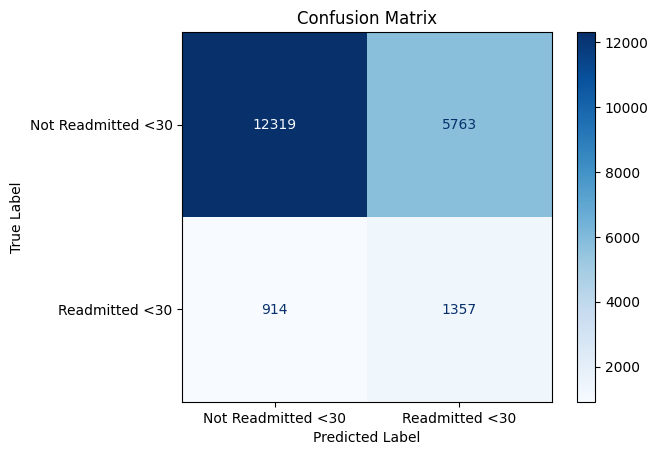

In [123]:
cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Readmitted <30', 'Readmitted <30'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

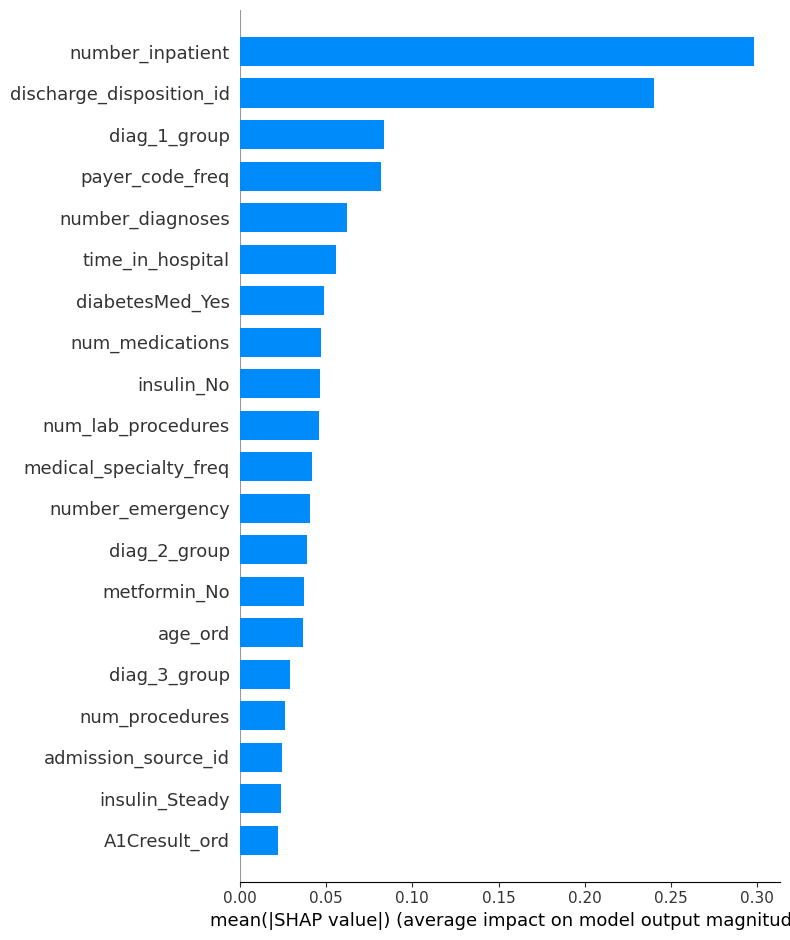

In [124]:
explainer = shap.Explainer(model)
shap_values_reduced = explainer(X_test_reduced)
shap.summary_plot(shap_values_reduced, X_test_reduced, plot_type="bar")

### Hyperparameter Tuning - Bayesian Optimization

- We use Bayesian optimization for hyperparameter tuning because it is more efficient and effective than grid or random search, often finding better settings with fewer trials

- Bayesian optimization builds a probabilistic model of how hyperparameters affect model performance and uses past results to choose the next best values to try.

- Search space I am using here is the range of possible values for each hyperparameter, defined by the user before tuning begins.



In [75]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 4.3 MB/s eta 0:00:00


In [83]:
from skopt import BayesSearchCV
from skopt.space import Real, Integer

# Defining the search space for hyperparameters
search_space = {
    'max_depth': Integer(3, 10),
    'learning_rate': Real(0.01, 0.3, prior='log-uniform'),
    'subsample': Real(0.5, 1.0),
    'colsample_bytree': Real(0.5, 1.0),
    'min_child_weight': Integer(1, 10),
    'gamma': Real(0, 0.5),
    'reg_alpha': Real(0, 1.0),
    'reg_lambda': Real(0.5, 2.0)
}

xgb = XGBClassifier(
    n_estimators=100,
    objective='binary:logistic',
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

In [84]:
bayes_search = BayesSearchCV(
    estimator=xgb,
    search_spaces=search_space,
    n_iter=100,
    cv=5,
    n_jobs=-1,
    scoring='roc_auc',
    verbose=2,
    random_state=42
)

bayes_search.fit(X_train_reduced, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fi

BayesSearchCV(cv=5,
              estimator=XGBClassifier(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bynode=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric='logloss', feature_types=None,
                                      gamma=None, grow_policy=None,
                                      importance_type=None,
                                      interaction_constraints=None,
                                      learning_rate...
                             'max_depth': Integer(low=3, high=10, prior='uniform', transform='normalize'),
                             'min_child_weight': Integer(low=1, high=10, prior='uniform', transform='normalize'),
                             'reg_alpha': Real(low=0, high=1.0, prior='uniform', transform='normalize'),
                             'reg_lambda': Real(low=0.5, high=2.0, prior='uniform', transform='normalize'),
                             'subsample': Real(low=0.5, high=1.0, prior='uniform', transform='normalize')},
              verbose=2)

In [85]:
print("Best parameters:", bayes_search.best_params_)
print("Best CV ROC AUC:", bayes_search.best_score_)

# Train final model with best parameters
best_xgb = bayes_search.best_estimator_
best_xgb.fit(X_train_reduced, y_train)

# Evaluate on test set
from sklearn.metrics import roc_auc_score
y_pred_proba = best_xgb.predict_proba(X_test_reduced)[:, 1]
print("Test ROC AUC:", roc_auc_score(y_test, y_pred_proba))

Best parameters: OrderedDict([('colsample_bytree', 0.5), ('gamma', 0.5), ('learning_rate', 0.022829017273210905), ('max_depth', 8), ('min_child_weight', 10), ('reg_alpha', 0.0), ('reg_lambda', 2.0), ('subsample', 0.8059882994103582)])
Best CV ROC AUC: 0.6768950324409327
Test ROC AUC: 0.6929838217804297


In [86]:
best_params = {
    'colsample_bytree': 0.5,
    'gamma': 0.5,
    'learning_rate': 0.022829017273210905,
    'max_depth': 8,
    'min_child_weight': 10,
    'reg_alpha': 0.0,
    'reg_lambda': 2.0,
    'subsample': 0.8059882994103582,
    'n_estimators': 100,
    'random_state': 42,
    'use_label_encoder': False,
    'eval_metric': 'logloss',
    'scale_pos_weight': scale_pos_weight
}

model = xgb.XGBClassifier(**best_params)
model.fit(X_train_reduced, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=0.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.022829017273210905, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [87]:
y_pred = model.predict(X_test_reduced)
y_pred_proba = model.predict_proba(X_test_reduced)[:, 1]

In [88]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score, classification_report, confusion_matrix
)

accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"ROC AUC: {roc_auc:.4f}\n")
print("Classification Report:\n", report)
print("Confusion Matrix:\n", cm)

Accuracy: 0.6684
ROC AUC: 0.6930

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.68      0.78     18082
           1       0.19      0.60      0.29      2271

    accuracy                           0.67     20353
   macro avg       0.56      0.64      0.54     20353
weighted avg       0.85      0.67      0.73     20353

Confusion Matrix:
 [[12236  5846]
 [  903  1368]]
